In [ ]:
import os
os.chdir('/content/drive/MyDrive/Udemy Project')
os.getcwd()

'/content/drive/MyDrive/Udemy Project'

In [ ]:
ls

'compresive_strength_concrete+2 (1).csv'   Section_6_Com_str.ipynb


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [ ]:
df_com_str = pd.read_csv('compresive_strength_concrete+2 (1).csv')
df_com_str.head()

Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
0                                      540.0  ...                                             79.99
1                                      540.0  ...                                             61.89
2                                      332.5  ...                                             40.27
3                                      332.5  ...                                             41.05
4                                      198.6  ...                                             44.30

[5 rows x 9 columns]

In [ ]:
df_com_str.shape

(1030, 9)

In [ ]:
df_com_str.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
df_com_str.describe()

Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
count                                1030.000000  ...                                       1030.000000
mean                                  281.167864  ...                                         35.817961
std                                   104.506364  ...                                         16.705742
min                                   102.000000  ...                                          2.330000
25%                                   192.375000  ...                                         23.710000
50%                                   272.900000  ...                                         34.445000
75%                                   350.000000  ...                                         46.135000
max                                   540.000000  ...                                         82.600000

[8 rows x 9 columns]

In [ ]:
df_com_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
df_com_str.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
df_com_str.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)' :'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Ash',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine', 
       'Age (day)':'Age',
       'Concrete compressive strength(MPa, megapascals) ' : "strength"
       },inplace=True)

In [ ]:
df_com_str.head()

Cement   Slag  Ash  Water  Superplasticizer  Coarse   Fine  Age  strength
0   540.0    0.0  0.0  162.0               2.5  1040.0  676.0   28     79.99
1   540.0    0.0  0.0  162.0               2.5  1055.0  676.0   28     61.89
2   332.5  142.5  0.0  228.0               0.0   932.0  594.0  270     40.27
3   332.5  142.5  0.0  228.0               0.0   932.0  594.0  365     41.05
4   198.6  132.4  0.0  192.0               0.0   978.4  825.5  360     44.30

In [ ]:
df_com_str.dtypes

Cement              float64
Slag                float64
Ash                 float64
Water               float64
Superplasticizer    float64
Coarse              float64
Fine                float64
Age                   int64
strength            float64
dtype: object

In [ ]:
df_com_str.isnull().sum()

Cement              0
Slag                0
Ash                 0
Water               0
Superplasticizer    0
Coarse              0
Fine                0
Age                 0
strength            0
dtype: int64

In [ ]:
df_com_str.describe().T

count        mean         std  ...      50%       75%     max
Cement            1030.0  281.167864  104.506364  ...  272.900   350.000   540.0
Slag              1030.0   73.895825   86.279342  ...   22.000   142.950   359.4
Ash               1030.0   54.188350   63.997004  ...    0.000   118.300   200.1
Water             1030.0  181.567282   21.354219  ...  185.000   192.000   247.0
Superplasticizer  1030.0    6.204660    5.973841  ...    6.400    10.200    32.2
Coarse            1030.0  972.918932   77.753954  ...  968.000  1029.400  1145.0
Fine              1030.0  773.580485   80.175980  ...  779.500   824.000   992.6
Age               1030.0   45.662136   63.169912  ...   28.000    56.000   365.0
strength          1030.0   35.817961   16.705742  ...   34.445    46.135    82.6

[9 rows x 8 columns]

## EDA

In [ ]:
from scipy import stats
Q1 = df_com_str['Cement'].quantile(q=0.25)
Q3 = df_com_str['Cement'].quantile(q=0.75)
print("1st quarntile (Q1) is :", Q1)
print("3rd quarntile (Q3) is :" ,Q3)
print("IQR Range is :"  ,stats.iqr(df_com_str['Cement']))

1st quarntile (Q1) is : 192.375
3rd quarntile (Q3) is : 350.0
IQR Range is : 157.625


In [ ]:
## outlier detections in cement columns in upper and lower limit
Lower_limit_cement = Q1 - 1.5 * (Q3-Q1)#stats.iqr(df_com_str['Cement')
Upper_limit_Cement = Q3 + 1.5 * stats.iqr(df_com_str['Cement'])

In [ ]:
Lower_limit_cement,Upper_limit_Cement

(-44.0625, 586.4375)

In [ ]:
## checking the presence of outliers in Cement columns countwise and precentage wise
print('No of lower outliers in Cement Columns' , df_com_str[df_com_str['Cement'] <Lower_limit_cement]['Cement'].count())
print('No of Upper outliers in Cement Columns' , df_com_str[df_com_str['Cement'] > Upper_limit_Cement]['Cement'].count())

print('% of lower outliers in Cement Columns' , df_com_str[df_com_str['Cement'] <Lower_limit_cement]['Cement'].count()*100/len(df_com_str),"%")
print('% of upper outliers in Cement Columns' , df_com_str[df_com_str['Cement'] >Upper_limit_Cement]['Cement'].count()*100/len(df_com_str),"%")

No of lower outliers in Cement Columns 0
No of Upper outliers in Cement Columns 0
% of lower outliers in Cement Columns 0.0 %
% of upper outliers in Cement Columns 0.0 %


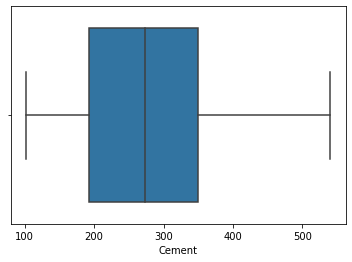

In [ ]:
# distribution of cement plot
sns.boxplot(x='Cement',data=df_com_str,orient='h')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ash')

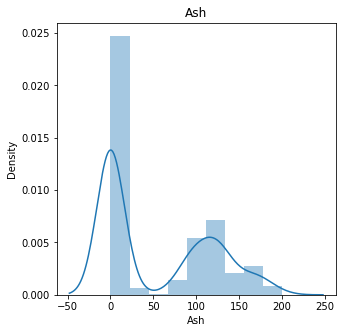

In [ ]:
# distplot
plt.figure(figsize=(5,5))
sns.distplot(df_com_str['Ash'])
plt.title('Ash')


1st quarntile (Q1) is : 164.9
3rd quarntile (Q3) is : 192.0
IQR Range is : 27.099999999999994
No of lower outliers in Water Columns 5
No of Upper outliers in Water Columns 4
% of lower outliers in Water Columns 0.4854368932038835 %
% of upper outliers in Water Columns 0.3883495145631068 %


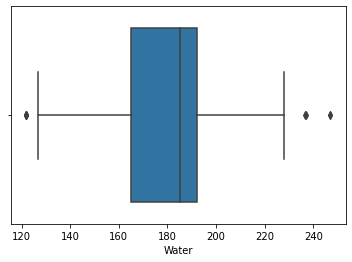

In [ ]:
Q1_Water = df_com_str['Water'].quantile(q=0.25)
Q3_Water = df_com_str['Water'].quantile(q=0.75)
print("1st quarntile (Q1) is :", Q1_Water)
print("3rd quarntile (Q3) is :" ,Q3_Water)
print("IQR Range is :"  ,stats.iqr(df_com_str['Water']))
Lower_limit_cement = Q1_Water - 1.5 * (Q3_Water-Q1_Water)#stats.iqr(df_com_str['Water')
Upper_limit_Cement = Q3_Water + 1.5 * stats.iqr(df_com_str['Water'])
print('No of lower outliers in Water Columns' , df_com_str[df_com_str['Water'] <Lower_limit_cement]['Water'].count())
print('No of Upper outliers in Water Columns' , df_com_str[df_com_str['Water'] > Upper_limit_Cement]['Water'].count())

print('% of lower outliers in Water Columns' , df_com_str[df_com_str['Water'] <Lower_limit_cement]['Water'].count()*100/len(df_com_str),"%")
print('% of upper outliers in Water Columns' , df_com_str[df_com_str['Water'] >Upper_limit_Cement]['Water'].count()*100/len(df_com_str),"%")
sns.boxplot(x='Water',data=df_com_str,orient='h')

## Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

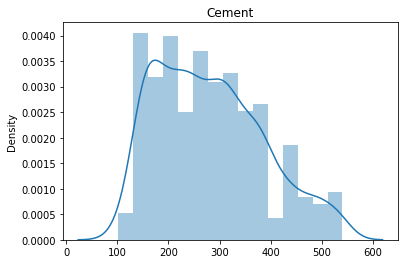

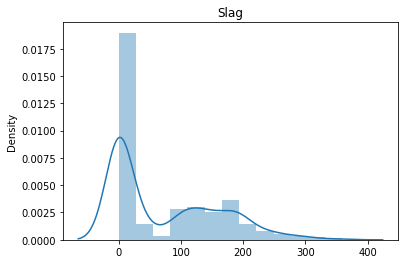

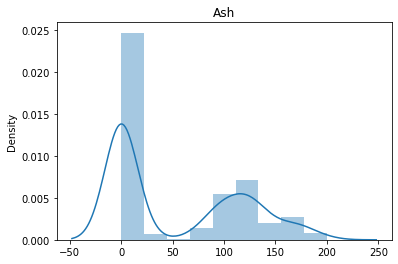

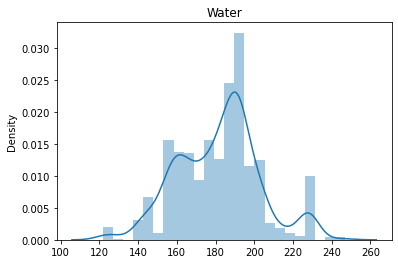

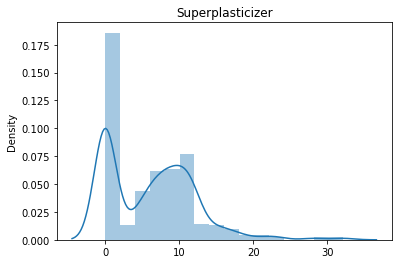

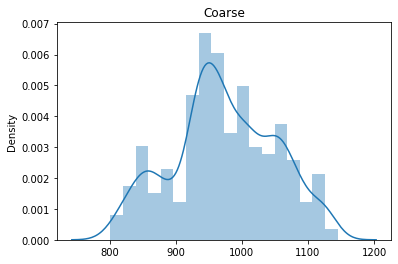

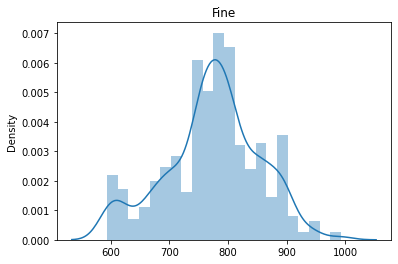

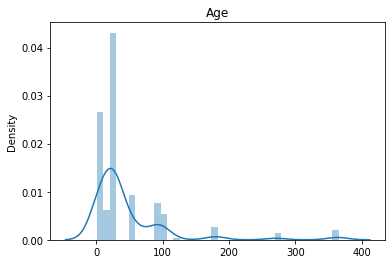

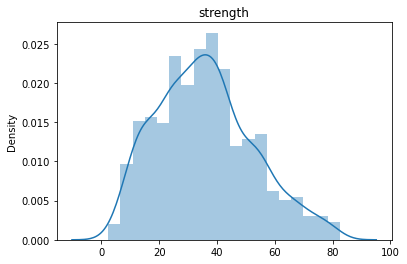

In [ ]:
# Distplot
#plt.subplots(3,3,figsize=(16,16))

for  i, col in enumerate (df_com_str.columns):
  plt.figure(i)
  sns.distplot(x = df_com_str[col]);
  plt.title(col)

<Figure size 720x720 with 0 Axes>

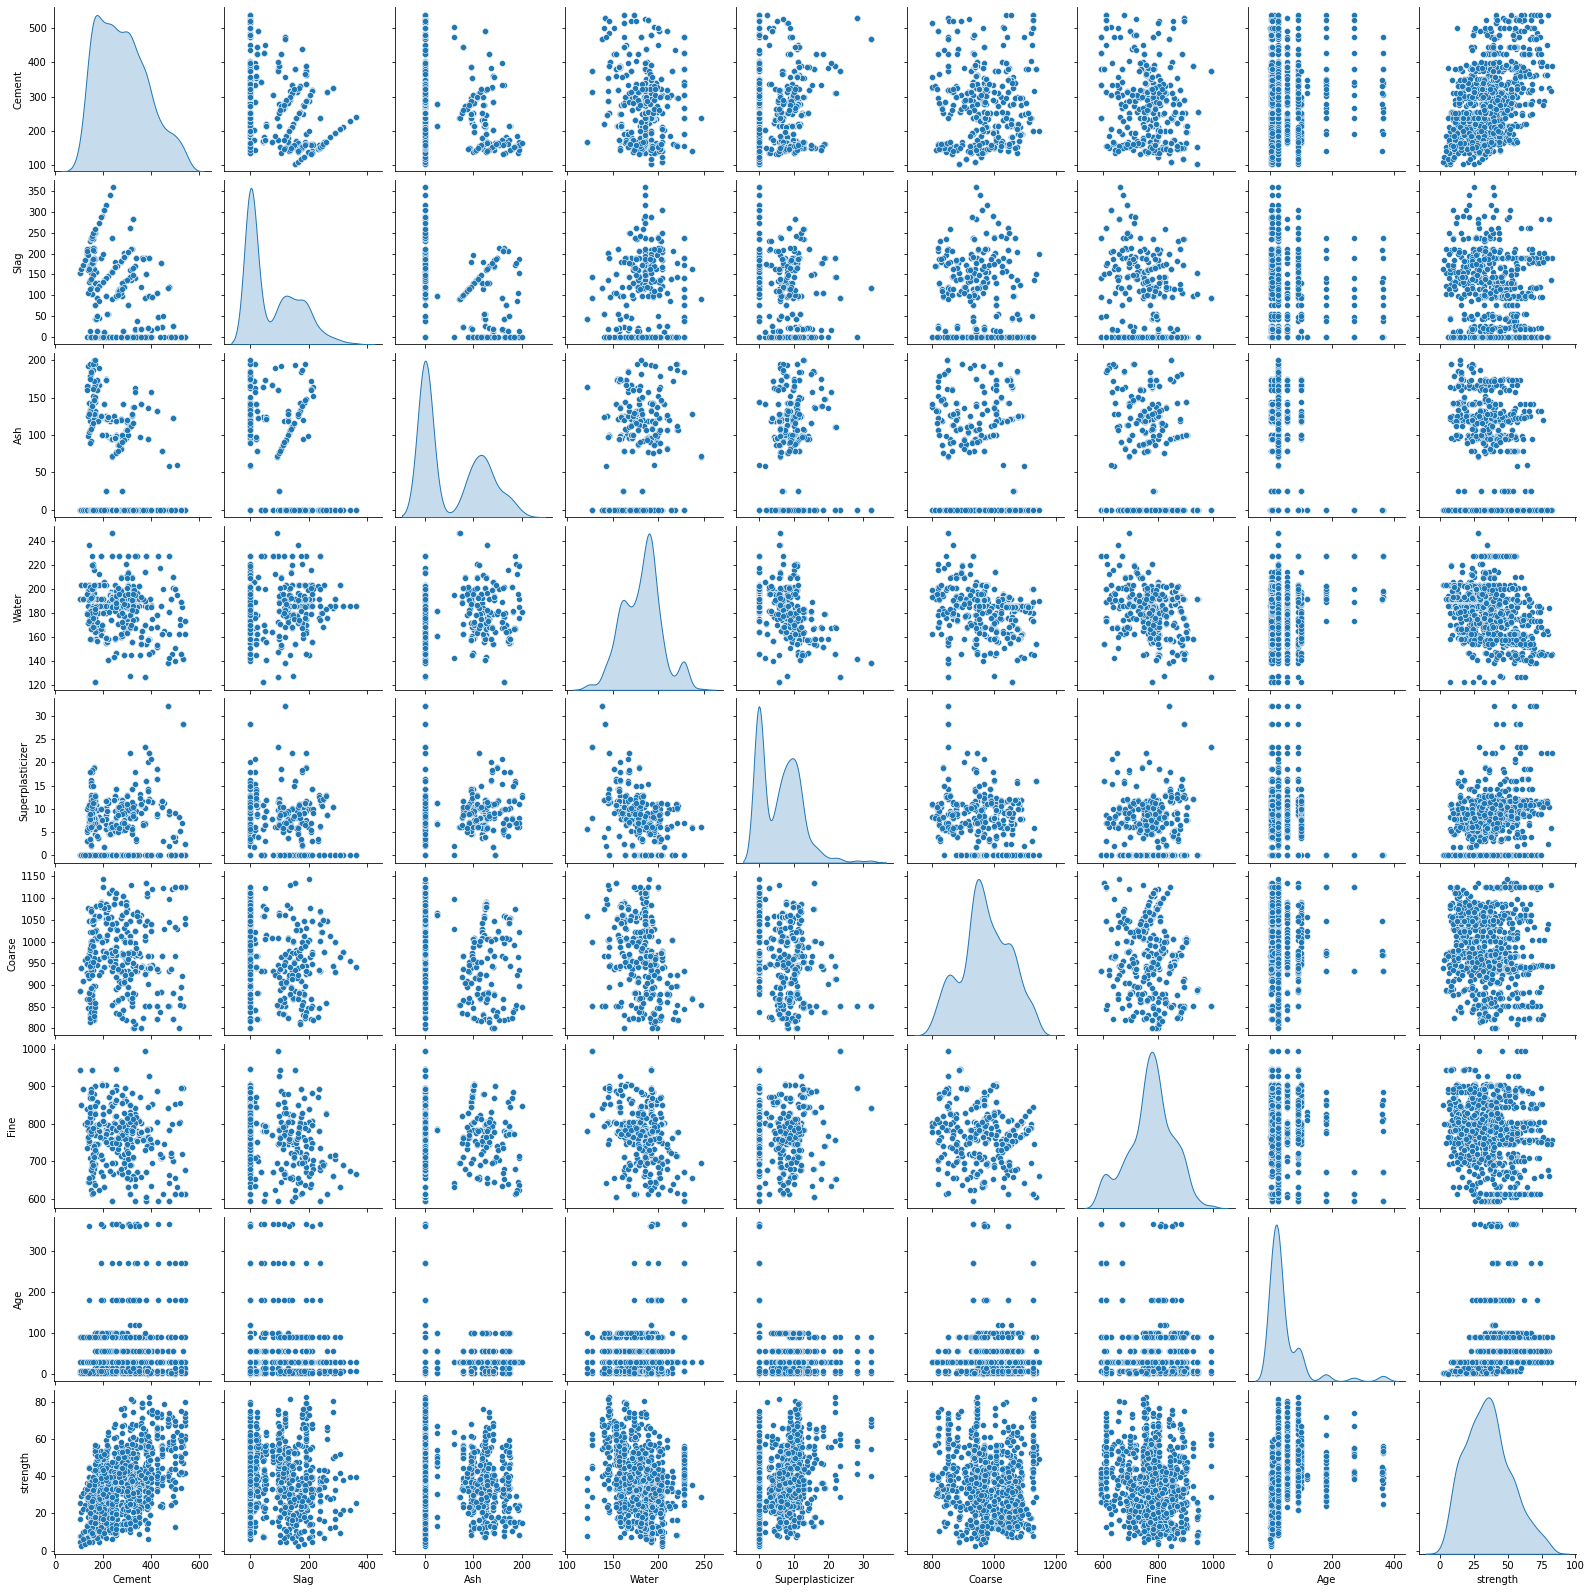

In [ ]:
## pairplot on data
plt.figure(figsize=(10,10))
sns.pairplot(df_com_str,diag_kind='kde')

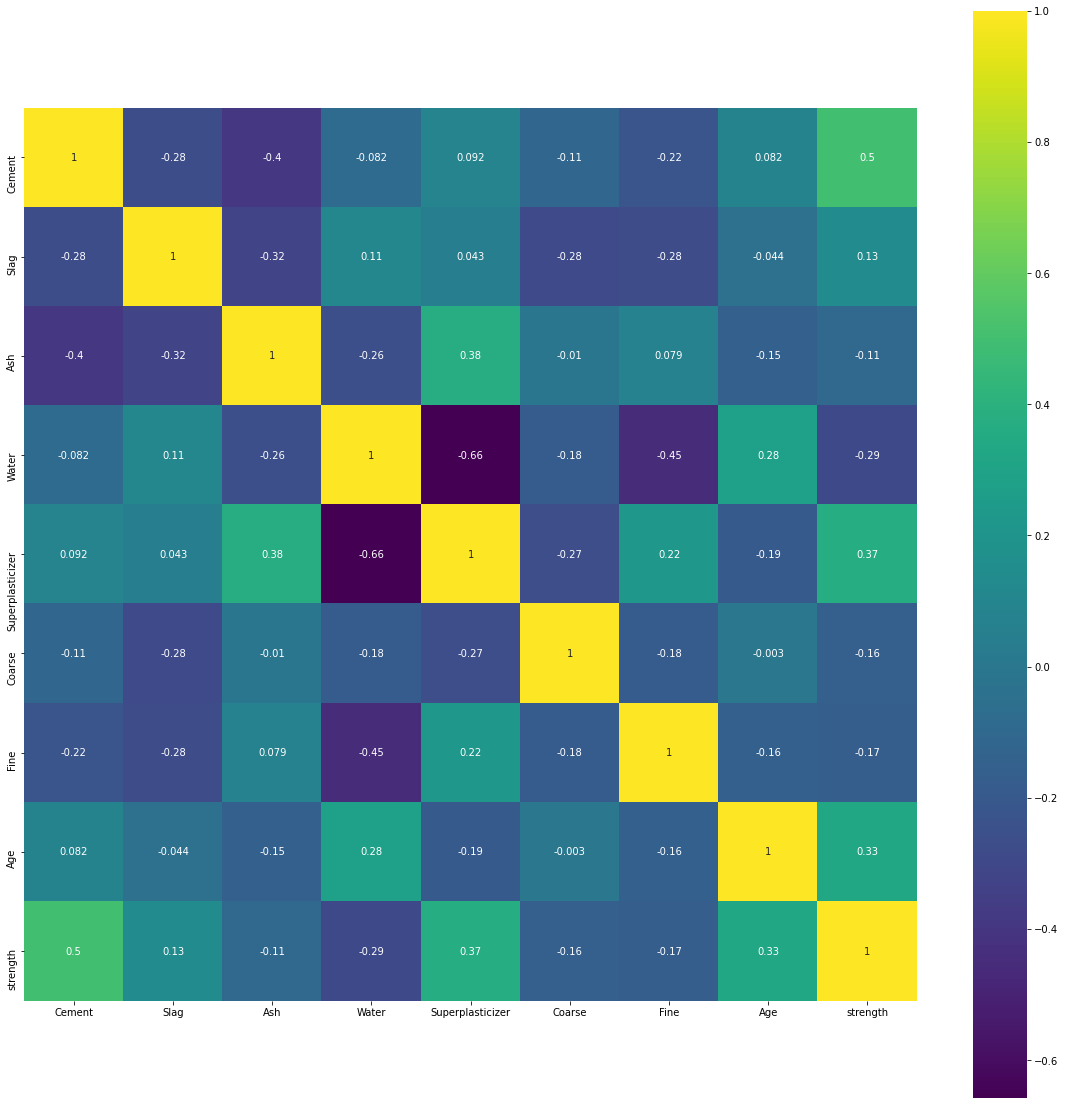

In [ ]:
# heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_com_str.corr(),annot=True,vmax=1,square=True,cmap = 'viridis')

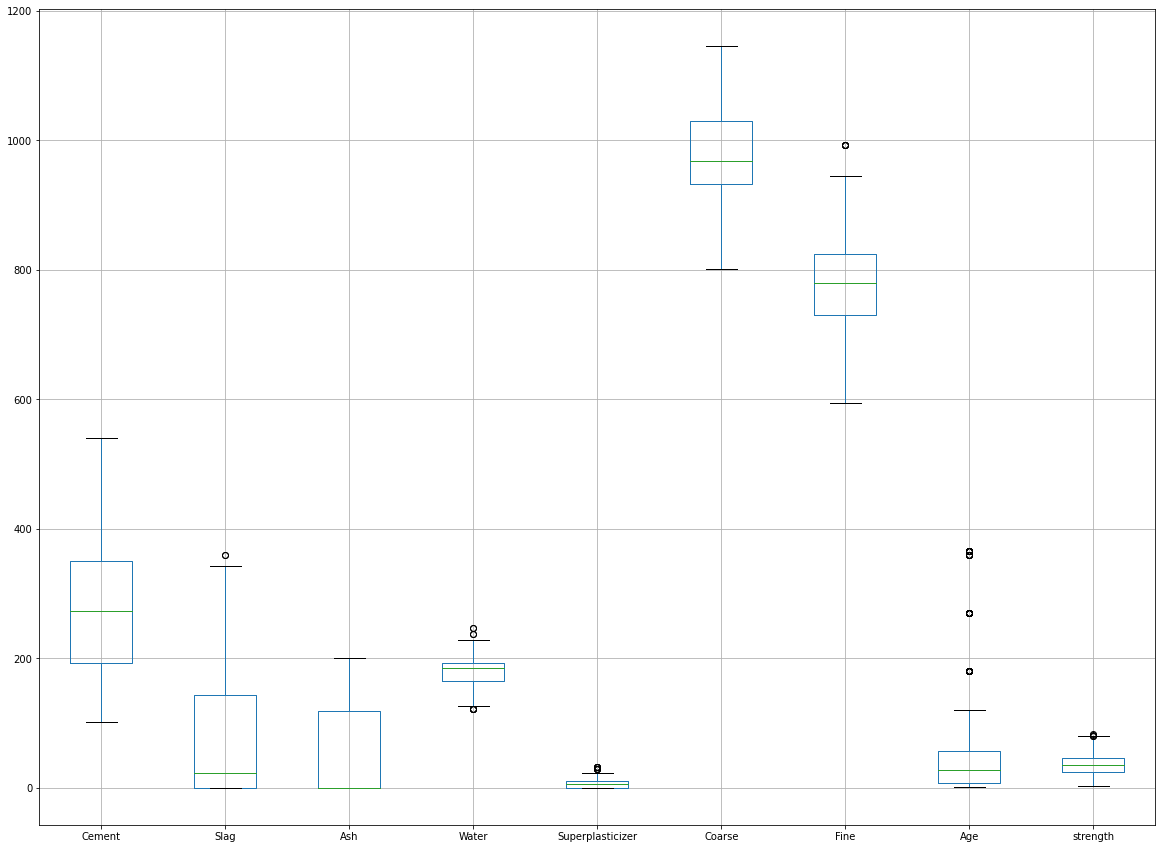

In [ ]:
# boxplot to detect the outlier in the dataset
df_com_str.boxplot(figsize=(20,15))

In [ ]:
## dedecting the no of outliers in the datasets
for i in df_com_str.columns[:-1]:
  print('Outliers detected in {} :'.format(i) , df_com_str[((df_com_str[i] - df_com_str[i].mean()) / df_com_str[i].std()).abs() >3][i].count())

Outliers detected in Cement : 0
Outliers detected in Slag : 4
Outliers detected in Ash : 0
Outliers detected in Water : 2
Outliers detected in Superplasticizer : 10
Outliers detected in Coarse : 0
Outliers detected in Fine : 0
Outliers detected in Age : 33


In [ ]:
df_com_str.columns

Index(['Cement', 'Slag', 'Ash', 'Water', 'Superplasticizer', 'Coarse', 'Fine',
       'Age', 'strength'],
      dtype='object')

In [ ]:
## Replacing the outliers with median if accuracy does not improve

## Feature Engineering and Model Building

In [ ]:
x = df_com_str.drop('strength',axis=1)
y = df_com_str['strength']


In [ ]:
x.head()

Cement   Slag  Ash  Water  Superplasticizer  Coarse   Fine  Age
0   540.0    0.0  0.0  162.0               2.5  1040.0  676.0   28
1   540.0    0.0  0.0  162.0               2.5  1055.0  676.0   28
2   332.5  142.5  0.0  228.0               0.0   932.0  594.0  270
3   332.5  142.5  0.0  228.0               0.0   932.0  594.0  365
4   198.6  132.4  0.0  192.0               0.0   978.4  825.5  360

In [ ]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: strength, dtype: float64

In [ ]:
# train and test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=0.3,random_state=32)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((721, 8), (309, 8), (721,), (309,))

## Building different Modesl

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)
# model performance
model.score(xtrain,ytrain)

0.9847257709682399

In [ ]:
from sklearn.metrics import r2_score
accur_1 = r2_score(ytest,y_pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(ytest,y_pred)
error_1=mean_squared_error(ytest,y_pred)

In [ ]:
model_name = []
accuracy_final = []
model_name,accuracy_final

([], [])

In [ ]:
model_name.append('Random_forest')
accuracy_final.append(accur_1)

In [ ]:
# Store the algorithm and accuracy results in dataframe to compare it in the end
#results_1 = pd.DataFrame({'Algo':model_name,'Accuray':accuracy_final},index={'1'})
#results_1

In [ ]:
# Kfold Cross validation on Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 20
k_fold = KFold(n_splits=k,shuffle=True,random_state=1)
k_results = cross_val_score(model,x_scaled,y,cv=k_fold)
accuracy_kf = np.mean(k_results)
print(k_results)
print(accuracy_kf)

[0.9436943  0.86697816 0.90892715 0.8985786  0.92757158 0.88958195
 0.93513353 0.88758693 0.95545561 0.9562376  0.93567    0.90209369
 0.92745684 0.95172334 0.92987416 0.92058523 0.93309632 0.93227966
 0.83543612 0.93833069]
0.9188145734030856


In [ ]:
model_name.append('Random_forest_K_fold')
accuracy_final.append(accuracy_kf)

# Gradient Boost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

model_gred = GradientBoostingRegressor()
model_gred.fit(xtrain,ytrain)
y_pred_gred = model_gred.predict(xtest)


# model performance
print("model Score:", model_gred.score(xtrain,ytrain))
accur_gred = r2_score(ytest,y_pred_gred)
print("accur_gred:", accur_gred)
mean_absolute_error(ytest,y_pred_gred)
error_1=mean_squared_error(ytest,y_pred_gred)
print("mean squared error :", error_1)

model Score: 0.9510110713576927
accur_gred: 0.8926121460398699
mean squared error : 25.87961068532871


In [ ]:
model_name.append('Gradient Boosting Regressor')
accuracy_final.append(accur_gred)

In [ ]:
print(model_name)
print(accuracy_final)

['Random_forest', 'Random_forest_K_fold', 'Gradient Boosting Regressor']
[0.905343241151065, 0.9188145734030856, 0.8926121460398699]


# K fold cross validation on Grandient Boosting

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 20
k_fold = KFold(n_splits=k,shuffle=True,random_state=1)
k_results_gred = cross_val_score(model_gred,x_scaled,y,cv=k_fold)
accuracy_kf_gred = np.mean(k_results_gred)
print(k_results_gred)
print(accuracy_kf_gred)

[0.90556799 0.89143407 0.89539397 0.87542813 0.93133183 0.85628896
 0.9153357  0.878159   0.93892025 0.95452446 0.93059078 0.85825155
 0.91838501 0.9203681  0.91497361 0.90704514 0.89371098 0.91363373
 0.87787824 0.91378585]
0.9045503688553966


In [ ]:
model_name.append('K Fold Gradient Boosting Regressor')
accuracy_final.append(accuracy_kf_gred)
print(model_name,accuracy_final)

['Random_forest', 'Random_forest_K_fold', 'Gradient Boosting Regressor', 'K Fold Gradient Boosting Regressor'] [0.905343241151065, 0.9188145734030856, 0.8926121460398699, 0.9045503688553966]


# Adaboost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

model_ada = AdaBoostRegressor()
model_ada.fit(xtrain,ytrain)
y_pred_ada = model_ada.predict(xtest)


# model performance
print("model Score:", model_ada.score(xtrain,ytrain))
accur_ada= r2_score(ytest,y_pred_ada)
print("accur_ada:", accur_gred)
mean_absolute_error(ytest,y_pred_ada)
error_1_ada=mean_squared_error(ytest,y_pred_ada)
print("mean squared error :", error_1_ada)

model Score: 0.8246139240415457
accur_ada: 0.8926121460398699
mean squared error : 52.261544401766216


In [ ]:
model_name.append('Ada Boosting Regressor')
accuracy_final.append(accur_ada)

In [ ]:
  print(model_name,'\n',accuracy_final)

['Random_forest', 'Random_forest_K_fold', 'Gradient Boosting Regressor', 'K Fold Gradient Boosting Regressor', 'Ada Boosting Regressor'] 
 [0.905343241151065, 0.9188145734030856, 0.8926121460398699, 0.9045503688553966, 0.7831398947152888]


# K fold cross validation on Ada Boosting

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 20
k_fold = KFold(n_splits=k,shuffle=True,random_state=1)
k_results_ada = cross_val_score(model_ada,x_scaled,y,cv=k_fold)
accuracy_kf_ada = np.mean(k_results_ada)
print(k_results_ada)
print(accuracy_kf_ada)

[0.81517024 0.71045227 0.76199567 0.71391755 0.79105841 0.73578891
 0.77808128 0.79568989 0.76788776 0.8520125  0.79993259 0.77072
 0.78931971 0.81885618 0.82741048 0.75046482 0.79388903 0.76822848
 0.80475901 0.80983069]
0.782773272719811


In [ ]:
model_name.append('K Fold cross validation Ada Boosting Regressor')
accuracy_final.append(accuracy_kf_ada)

In [ ]:
print(model_name,'\n',accuracy_final)

['Random_forest', 'Random_forest_K_fold', 'Gradient Boosting Regressor', 'K Fold Gradient Boosting Regressor', 'Ada Boosting Regressor', 'K Fold cross validation Ada Boosting Regressor'] 
 [0.905343241151065, 0.9188145734030856, 0.8926121460398699, 0.9045503688553966, 0.7831398947152888, 0.782773272719811]


# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

diff_K = []
for i in range(1,45):
  model_knn_i = KNeighborsRegressor(n_neighbors=i)
  model_knn_i.fit(xtrain,ytrain)
  y_pred_knn_i = model_knn_i.predict(xtest)
  # model performance
  print("model Score:", model_knn_i.score(xtrain,ytrain))
  accur_knn_i= r2_score(ytest,y_pred_knn_i)
  print("accur_ada:", accur_knn_i) 
  diff_K.append(accur_knn_i)
  print('Error value for k= ' , i , 'is:', accur_knn_i)

model Score: 0.992965556889174
accur_ada: 0.6334784175646302
Error value for k=  1 is: 0.6334784175646302
model Score: 0.9254212243676927
accur_ada: 0.632066353445631
Error value for k=  2 is: 0.632066353445631
model Score: 0.8670084934344527
accur_ada: 0.6343820657268766
Error value for k=  3 is: 0.6343820657268766
model Score: 0.8433014985627536
accur_ada: 0.6391411704043601
Error value for k=  4 is: 0.6391411704043601
model Score: 0.8145904594897111
accur_ada: 0.6516278964488704
Error value for k=  5 is: 0.6516278964488704
model Score: 0.7988618079012505
accur_ada: 0.6387864850282008
Error value for k=  6 is: 0.6387864850282008
model Score: 0.7857005865199326
accur_ada: 0.6277790672872079
Error value for k=  7 is: 0.6277790672872079
model Score: 0.7692544459494985
accur_ada: 0.621527889365159
Error value for k=  8 is: 0.621527889365159
model Score: 0.7532195188030123
accur_ada: 0.6184693855952782
Error value for k=  9 is: 0.6184693855952782
model Score: 0.745834566829233
accur_ada: 

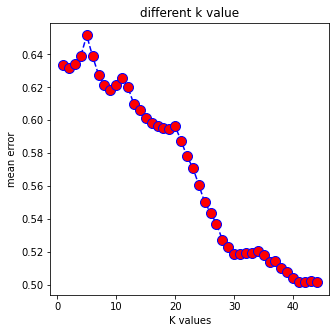

In [ ]:
# Elbow method
plt.figure(figsize=(5,5))
plt.plot(range(1,45),diff_K,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('different k value')
plt.xlabel('K values')
plt.ylabel('mean error')
plt.show()

In [ ]:
# from elbow method, we find out that K =5 is good for KNN regressor model
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(xtrain,ytrain)
y_pred_knn = model_knn.predict(xtest)


# model performance
print("model Score:", model_knn.score(xtrain,ytrain))
accur_knn= r2_score(ytest,y_pred_knn)
print("accur_ada:", accur_knn)
mean_absolute_error(ytest,y_pred_knn)
error_1_knn=mean_squared_error(ytest,y_pred_knn)
print("mean squared error :", error_1_knn)


model Score: 0.8145904594897111
accur_ada: 0.6516278964488704
mean squared error : 83.95488019417478


In [ ]:
model_name.append('KNN regressor ')
accuracy_final.append(accur_knn)

In [ ]:
print(model_name,'\n',accuracy_final)

['Random_forest', 'Random_forest_K_fold', 'Gradient Boosting Regressor', 'K Fold Gradient Boosting Regressor', 'Ada Boosting Regressor', 'K Fold cross validation Ada Boosting Regressor', 'KNN regressor '] 
 [0.905343241151065, 0.9188145734030856, 0.8926121460398699, 0.9045503688553966, 0.7831398947152888, 0.782773272719811, 0.6516278964488704]


## K fold cross val on KNN regressor

In [ ]:
k = 20
k_fold = KFold(n_splits=k,shuffle=True,random_state=1)
k_results_knn = cross_val_score(model_knn,x_scaled,y,cv=k_fold)
accuracy_kf_knn = np.mean(k_results_knn)
print(k_results_knn)
print(accuracy_kf_knn)

[0.73414885 0.6860569  0.73123497 0.44433075 0.77331954 0.59299358
 0.80098724 0.64221769 0.77840754 0.81029399 0.76124742 0.728298
 0.78496344 0.71111514 0.74429026 0.69999962 0.75273641 0.7664948
 0.71703924 0.73474774]
0.7197461569894605


In [ ]:
model_name.append('k fold cross val KNN regressor ')
accuracy_final.append(accuracy_kf_knn)
print(model_name,'\n',accuracy_final)

['Random_forest', 'Random_forest_K_fold', 'Gradient Boosting Regressor', 'K Fold Gradient Boosting Regressor', 'Ada Boosting Regressor', 'K Fold cross validation Ada Boosting Regressor', 'KNN regressor ', 'k fold cross val KNN regressor '] 
 [0.905343241151065, 0.9188145734030856, 0.8926121460398699, 0.9045503688553966, 0.7831398947152888, 0.782773272719811, 0.6516278964488704, 0.7197461569894605]


In [ ]:
print(model_name,'\n',accuracy_final)

['Random_forest', 'Random_forest_K_fold', 'Gradient Boosting Regressor', 'K Fold Gradient Boosting Regressor', 'Ada Boosting Regressor', 'K Fold cross validation Ada Boosting Regressor', 'KNN regressor ', 'k fold cross val KNN regressor '] 
 [0.905343241151065, 0.9188145734030856, 0.8926121460398699, 0.9045503688553966, 0.7831398947152888, 0.782773272719811, 0.6516278964488704, 0.7197461569894605]


#### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_model = DecisionTreeRegressor()
dec_model.fit(xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print("Feature Importance:",'\n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=x.columns))

Feature Importance: 
                   Importance
Cement              0.369418
Slag                0.082821
Ash                 0.023973
Water               0.112081
Superplasticizer    0.038969
Coarse              0.036255
Fine                0.030174
Age                 0.306309


In [ ]:
y_pred_dec = dec_model.predict(xtest)

In [ ]:
dec_model.score(xtrain,ytrain)

0.9956155554314808

In [ ]:
dec_model.score(xtest,ytest)

0.7828486320624468

In [ ]:
accur_dec = r2_score(ytest,y_pred_dec)

In [ ]:
accur_dec

0.7828486320624468

In [ ]:
model_name.append('Decision Tree regressor ')
accuracy_final.append(accur_dec)

In [ ]:
print(model_name,'\n',accuracy_final)

['Random_forest', 'Random_forest_K_fold', 'Gradient Boosting Regressor', 'K Fold Gradient Boosting Regressor', 'Ada Boosting Regressor', 'K Fold cross validation Ada Boosting Regressor', 'KNN regressor ', 'k fold cross val KNN regressor ', 'Decision Tree regressor '] 
 [0.905343241151065, 0.9188145734030856, 0.8926121460398699, 0.9045503688553966, 0.7831398947152888, 0.782773272719811, 0.6516278964488704, 0.7197461569894605, 0.7828486320624468]


In [ ]:
print(pd.DataFrame({'Model Name' : model_name,"Accuracy ": accuracy_final}))

                                       Model Name  Accuracy 
0                                   Random_forest   0.905343
1                            Random_forest_K_fold   0.918815
2                     Gradient Boosting Regressor   0.892612
3              K Fold Gradient Boosting Regressor   0.904550
4                          Ada Boosting Regressor   0.783140
5  K Fold cross validation Ada Boosting Regressor   0.782773
6                                  KNN regressor    0.651628
7                 k fold cross val KNN regressor    0.719746
8                        Decision Tree regressor    0.782849


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [ ]:
feature_cols = x.columns

In [ ]:
feature_cols

Index(['Cement', 'Slag', 'Ash', 'Water', 'Superplasticizer', 'Coarse', 'Fine',
       'Age'],
      dtype='object')

In [ ]:
dot_data = StringIO()
export_graphviz(dec_model,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Concrete.png')
Image(graph.create_png())